In [1]:
# coding=utf-8
# write code...
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from kalmanfilter import klf
%matplotlib inline

def main():
    #load data
    df = pd.read_csv("data.csv")
    df_y = df["mean_traveltime"]
    y = np.log(np.array(df_y))

    df_exogenous_variables= df[["holiday_normal","holiday_moon_fes", "holiday_GW", "workday_normal", "workday_special"]]
    exogenous_variables = np.array(df_exogenous_variables)
    num_exogenous_variables = 5

    #The state transition model
    #   x_ = F *  x +  G * w, w ~ N(0,Q)
    F = np.array([                             #dim of F:1+11*1+11
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])


    G = np.array([
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

    Q = 0.1 * np.identity(17)

    #The observation model
    #y = H * x + v, v ~ N(0,R)
    a_horilday_normal = 0.1
    a_holiday_moon_fes = 0.2
    a_holiday_GoldanWeek = 0.3
    a_workday_normal = 0.1
    a_workday_irregular = 0.1

    H = np.array([1,1,0,0,0,0,0,0,0,0,0,0,
                  a_horilday_normal,
                  a_holiday_moon_fes,
                  a_holiday_GoldanWeek,
                  a_workday_normal,
                  a_workday_irregular])
    R = 1.5

    # 初期値設定
    x0 = y[0] * np.ones(17).T
    x0[-1*num_exogenous_variables:] = exogenous_variables[0]
    Sigma0 = 0.01 * np.identity(17)
    T = 382

    kalmanfilter = klf()
    kalmanfilter.set_state_transition_model(F, G, Q)
    kalmanfilter.set_observation_model(H, R, num_exogenous_variables)
    M, x_estimated, y_estimated, ei_values, S_values = kalmanfilter.filtering(T, y, x0, Sigma0, exogenous_variables)

    y_estimated = np.exp(y_estimated)
    y_train = np.array(df_y)

    plt.plot(y_train[50:], 'y' ,label='Observed value', linewidth=2)
    plt.plot(y_estimated[50:], 'blue', label='estimated value', linewidth=0.7)
    plt.title('Travel time estimation')
    plt.xlabel('time step')
    plt.ylabel('travel time')
    plt.legend(loc='best')
    plt.show()

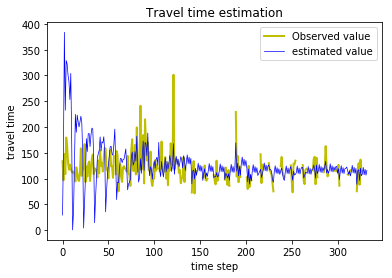

In [2]:
if __name__ == '__main__':
    main()